## Movie Analysis For Microsoft

#### Authors: Justin Weible, Jonathan Bragg

### Overview

This project analyzes the box office revenue and performace of movies that were released from 2010-2018. Analysis of movies from that time period show that production studios and moviegoers have very similar preferences for specific movie genres, and that is reflected in both the number of movies released in certain genres and the revenues that are generated from those genres. A new movie studio could use this analysis to decide the types of movies that might generate the most revenue for their studio.

### Business Problem

Microsoft wants to create original video content and are going to create a movie studio.
They are looking for recommendations about what types of films are doing well at the box office in order to decide what types of movies to make.


### Data Understanding

IMDB and Box Office Mojo both have datasets for movies based on movie title, movie genre, gross revenues, and budgets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format

In [2]:
data_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
data_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
data_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
data_budget = pd.read_csv('zippedData/Mojo_budget_update.csv')

### Dataset Explanation

Three of the four datasets that were used provide records of movies released between 2010 and 2018. 
One of the datasets from Box Office Mojo provided records from 1990-2020. 

In [3]:
data_movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0000,664300000,2010


In [4]:
data_title_ratings.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3000,31
1,tt10384606,8.9000,559
2,tt1042974,6.4000,20


In [5]:
data_title_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0000,Drama


In [6]:
data_budget.head(3)

,tconst,year,budget
0,tt0099088,1990,40000000
1,tt0099165,1990,47000000
2,tt0099348,1990,22000000


### Data Cleaning (Part 1)

For the first section of data cleaning, three of the datasets were merged together in order to form one dataframe that could be used for the overall analysis.

IMDB datasets contain a unique ID that's used to identify the data, making it easier to merge IMDB datasets. Columns were renamed in order to make it easier to merge other datasets with the IMDB datasets.

A column was added to calculate total gross revenue, and columns that were not necessary for the analysis were dropped from the dataframe.

Because some of the data did not contain information on either domestic gross revenue or foreign gross revenue, those entries were also dropped.

In [7]:
data_title_overall = pd.merge(data_title_basics, data_title_ratings, on='tconst', how='inner')

In [8]:
data_title_overall = data_title_overall.rename(columns={'primary_title': 'title'})

In [9]:
movie_titles = pd.merge(data_movie_gross, data_title_overall, on='title', how='inner')

In [10]:
movie_titles = movie_titles[['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'genres', 'numvotes']]

In [11]:
movie_titles.dropna(axis=0, how='any', inplace=True)

In [12]:
movie_titles['foreign_gross'] = movie_titles.foreign_gross.str.split(',').str.join('').astype(float)

In [13]:
movie_titles['total_gross'] = movie_titles['domestic_gross'] + movie_titles['foreign_gross']

In [14]:
movie_titles_genres = movie_titles[['title', 'studio', 'genres', 'total_gross', 'year', 'numvotes']]
movie_titles_genres.head()

,title,studio,genres,total_gross,year,numvotes
0,Toy Story 3,BV,"Adventure,Animation,Comedy",1067000000.0000,2010,682218
1,Inception,WB,"Action,Adventure,Sci-Fi",828300000.0000,2010,1841066
2,Shrek Forever After,P/DW,"Adventure,Animation,Comedy",752600000.0000,2010,167532
3,The Twilight Saga: Eclipse,Sum.,"Adventure,Drama,Fantasy",698500000.0000,2010,211733
4,Iron Man 2,Par.,"Action,Adventure,Sci-Fi",623900000.0000,2010,657690


In [15]:
#Sorted the dataset and calculated the average gross revenue by year
data=movie_titles_genres.groupby('year')['total_gross'].mean()
data

year
2010    93354131.5467
2011    91649511.2172
2012   102862947.8837
2013   154303561.6054
2014   123818082.0194
2015   147134826.3697
2016   148168709.6667
2017   174275364.9885
2018   159626217.3094
Name: total_gross, dtype: float64

Text(0, 0.5, 'Average Gross Revenue (in billions)')

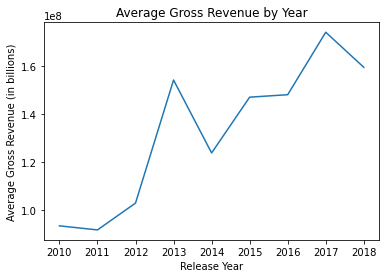

In [16]:
data.plot()
plt.title('Average Gross Revenue by Year')
plt.xlabel('Release Year')
plt.ylabel('Average Gross Revenue (in billions)')

### Feature Engineering

Since each movie could be associated with up to three genres, two Python functions were created in order to separate the genres in order to create a dataframe that would allow us to analyze the data for each of the genres separately over the time period between 2010-2018.

In [17]:
def count_genre(x):
    data_plot = movie_titles_genres[x].str.cat(sep = ',')
    data = pd.Series(data_plot.split(','))
    info = data.value_counts(ascending=False)
    return info

In [18]:
unique_genres = movie_titles_genres.genres.unique()
movie_genres_list = []

for x in unique_genres:
    movie_genres_list.extend(x.split(','))

movie_genres = (list(set(movie_genres_list)))
movie_genres = sorted(movie_genres)

In [19]:
genre_list = movie_genres
genre_list

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

### Analysis: Part 1

#### Number of Releases Per Genre

Based on the available data from 2010 to 2018, it was concluded that the most popular types of movies that were released in this period were in the genres of Drama, Action, Comedy, and Adventure.

In [20]:
total_genre_movies = count_genre('genres')

Text(0, 0.5, 'Genres')

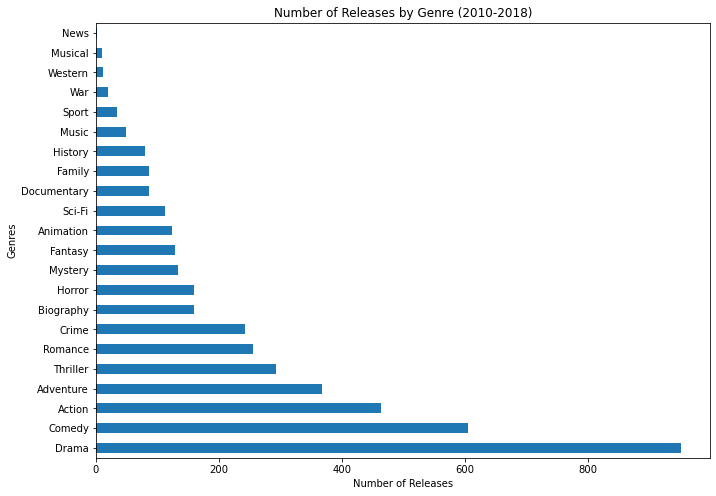

In [21]:
#Horizontal Bar Graph of the Number of Releases by Genre
total_genre_movies.plot(kind='barh', figsize=(11,8))
plt.title('Number of Releases by Genre (2010-2018)')
plt.xlabel('Number of Releases')
plt.ylabel('Genres')

#### Movie Popularity Based on Genre

Since IMDB provides a count of the number of votes from its users that are used to generate their movie ratings, we were able to use the number of votes cast on movies in each genre in order to show that Drama, Action, Comedy, and Adventure were also the four most popular genres of movie for moviegoers.

In [22]:
genre_details_pop = list(map(str, (movie_titles_genres['genres'])))

year = np.array(movie_titles_genres['year'])
popularity = np.array(movie_titles_genres['numvotes'])

In [23]:
## Created a new dataframe full of NaN values, then wrote a for loop to interate through the dataframe and replace the null values with the sum of 'total_gross

popularity_df = pd.DataFrame(index = genre_list, columns=range(2010, 2019))
popularity_df = popularity_df.fillna(value = 0.0)
z = 0
for i in genre_details_pop:
    split_genre = list(map(str, i.split(',')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [24]:
popularity_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Action,8831356.0000,9585422.0000,9680847.0000,9676470.0000,10422221.0000,7779078.0000,8532350.0000,6729552.0000,5103660.0000
Adventure,8386939.0000,7218940.0000,7879477.0000,9449823.0000,9088696.0000,7813257.0000,7846786.0000,5892383.0000,4537786.0000
Animation,2604601.0000,1379983.0000,1654662.0000,1707329.0000,1110429.0000,1133328.0000,1833585.0000,885992.0000,430839.0000
Biography,1956881.0000,898418.0000,1022759.0000,3378978.0000,1946134.0000,2194176.0000,1550085.0000,1325443.0000,1206092.0000
Comedy,6902484.0000,7131145.0000,7464407.0000,5833280.0000,5017910.0000,5731540.0000,5278829.0000,3638216.0000,2286263.0000


In [25]:
# Calculated the standard score of popularity_df in order to see which genres were more popular than the standard deviation
# of popularity_df in order to see which genres were definitely more popular and which ones underperformed
def calculate_std(x):
    return (x - x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Action,2.1106,2.1790,2.2176,2.0308,2.3618,2.0581,2.5260,2.5586,2.7642
Adventure,1.9573,1.4135,1.6359,1.9625,1.9556,2.0708,2.2570,2.1347,2.3666
Animation,-0.0366,-0.4755,-0.3742,-0.3703,-0.4746,-0.4101,-0.1029,-0.4003,-0.5193
Biography,-0.2599,-0.6313,-0.5783,0.1334,-0.2200,-0.0161,-0.2141,-0.1777,0.0255
Comedy,1.4455,1.3851,1.5018,0.8728,0.7156,1.2976,1.2492,0.9933,0.7845


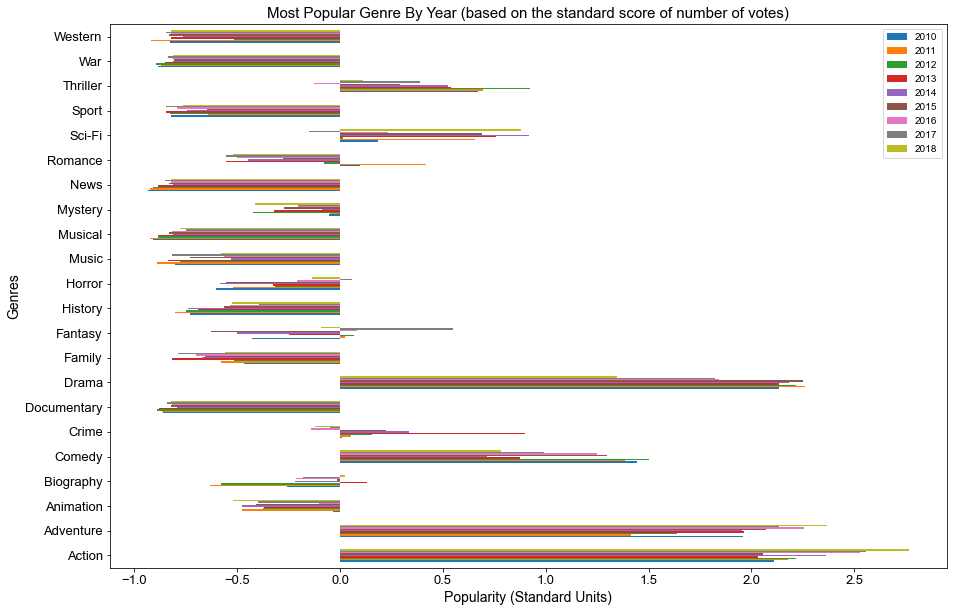

In [26]:
popular_genre.plot(kind='barh',figsize = (15,10),fontsize=13)
plt.title("Most Popular Genre By Year (based on the standard score of number of votes)",fontsize=15)
plt.xlabel("Popularity (Standard Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

#### Genre Popularity vs. Genre Revenues

The popularity of specific movie genres and the amount of revenue they generate appear to follow the same trends. However, there is one outlier where the popularity in Drama movies dropped significantly in 2018. While the revenue also dropped, Drama movies still remained among the highest moneymakers.

<AxesSubplot:>

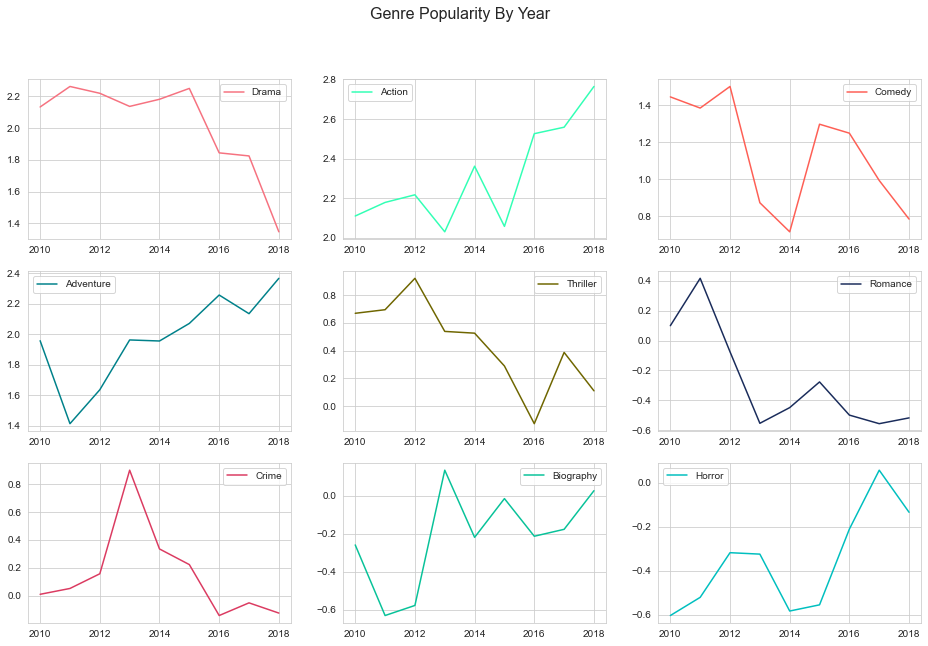

In [27]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(3,3,figsize = (16,10))

fig.suptitle('Genre Popularity By Year',fontsize = 16)

popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
popular_genre.loc['Action'].plot(label = "Action",color='#33FFB5',ax = ax[0][1],legend=True)
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Thriller'].plot(label = "Thriller",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Biography'].plot(label = "Biography",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Horror'].plot(label = "Horror",color='c',ax = ax[2][2],legend=True)

In [28]:
genre_details_gross = list(map(str, (movie_titles_genres['genres'])))

year = np.array(movie_titles_genres['year'])
gross = np.array(movie_titles_genres['total_gross'])

In [29]:
gross_df = pd.DataFrame(index = genre_list, columns=range(2010, 2019))
gross_df = gross_df.fillna(value = 0.0)
z = 0
for i in genre_details_gross:
    split_genre = list(map(str, i.split(',')))
    gross_df.loc[split_genre, year[z]] = gross_df.loc[split_genre, year[z]] + gross[z]
    z+=1

<AxesSubplot:>

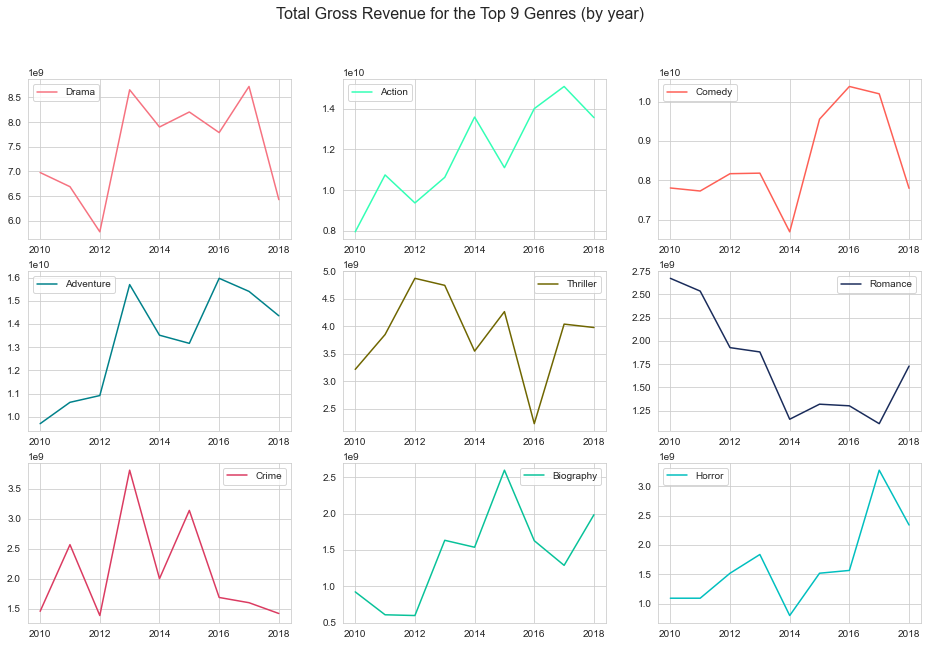

In [30]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(3,3,figsize = (16,10))

fig.suptitle('Total Gross Revenue for the Top 9 Genres (by year)',fontsize = 16)

gross_df.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
gross_df.loc['Action'].plot(label = "Action",color='#33FFB5',ax = ax[0][1],legend=True)
gross_df.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
gross_df.loc['Adventure'].plot(label = "Adventure",color='#00818a',ax = ax[1][0],legend=True)
gross_df.loc['Thriller'].plot(label = "Thriller",color='#6f6600',ax = ax[1][1],legend=True)
gross_df.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
gross_df.loc['Crime'].plot(label = "Crime",color='#db3b61',ax = ax[2][0],legend=True)
gross_df.loc['Biography'].plot(label = "Biography",color='#08c299',ax = ax[2][1],legend=True)
gross_df.loc['Horror'].plot(label = "Horror",color='c',ax = ax[2][2],legend=True)

#### Data Cleaning (Part 2):

In this section, I created an entirely new dataframe using the provided Box Office Mojo movie gross dataset and a dataset 
that I found that showed the budgets for movies on Box Office Mojo.

The new dataset also contained the column 'tframe', which I was able to use to merge the dataframes.
The overall functions are the same, but I needed a clean dataframe with a different name to work from.

In [31]:
df = pd.merge(data_title_basics, data_title_ratings, on='tconst', how='inner')

In [32]:
data_budget_overall = pd.merge(df, data_budget, on='tconst', how='inner')

In [33]:
data_budget_overall = data_budget_overall.rename(columns={'primary_title': 'title'})

In [34]:
movie_titles_budget = pd.merge(data_movie_gross, data_budget_overall, on='title', how='inner')
movie_titles_budget.head()

,title,studio,domestic_gross,foreign_gross,year_x,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year_y,budget
0,Toy Story 3,BV,415000000.0000,652000000,2010,tt0435761,Toy Story 3,2010,103.0000,"Adventure,Animation,Comedy",8.3000,682218,2010,200000000
1,Inception,WB,292600000.0000,535700000,2010,tt1375666,Inception,2010,148.0000,"Action,Adventure,Sci-Fi",8.8000,1841066,2010,160000000
2,Shrek Forever After,P/DW,238700000.0000,513900000,2010,tt0892791,Shrek Forever After,2010,93.0000,"Adventure,Animation,Comedy",6.3000,167532,2010,165000000
3,The Twilight Saga: Eclipse,Sum.,300500000.0000,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0000,"Adventure,Drama,Fantasy",5.0000,211733,2010,68000000
4,Iron Man 2,Par.,312400000.0000,311500000,2010,tt1228705,Iron Man 2,2010,124.0000,"Action,Adventure,Sci-Fi",7.0000,657690,2010,200000000


In [35]:
movie_titles_budget = movie_titles_budget.rename(columns={'year_x': 'year'})

In [36]:
movie_titles_budget.dropna(axis=0, how='any', inplace=True)

In [37]:
movie_titles_budget['foreign_gross'] = movie_titles_budget.foreign_gross.str.split(',').str.join('').astype(float)

In [38]:
movie_titles_budget['total_gross'] = movie_titles_budget['domestic_gross'] + movie_titles_budget['foreign_gross']

In [39]:
movie_titles_budget = movie_titles_budget[['title', 'studio', 'genres', 'total_gross', 'budget', 'year',  'numvotes']]
movie_titles_budget.head()

,title,studio,genres,total_gross,budget,year,numvotes
0,Toy Story 3,BV,"Adventure,Animation,Comedy",1067000000.0000,200000000,2010,682218
1,Inception,WB,"Action,Adventure,Sci-Fi",828300000.0000,160000000,2010,1841066
2,Shrek Forever After,P/DW,"Adventure,Animation,Comedy",752600000.0000,165000000,2010,167532
3,The Twilight Saga: Eclipse,Sum.,"Adventure,Drama,Fantasy",698500000.0000,68000000,2010,211733
4,Iron Man 2,Par.,"Action,Adventure,Sci-Fi",623900000.0000,200000000,2010,657690


#### Data Analysis Part 2:

There is a positive correlation between the size of production budget and how much a movie generates in revenue. However, there are some outliers that may occur due to outside factors.

In [40]:
info2 = pd.DataFrame(movie_titles_budget['total_gross'].sort_values(ascending=False))
data_set = ['title', 'year', 'budget', 'genres']
for i in data_set:
    info2[i] = movie_titles_budget[i]
info2.head(3)

,total_gross,title,year,budget,genres
542,1405400000.0000,Avengers: Age of Ultron,2015,250000000,"Action,Adventure,Sci-Fi"
733,1332600000.0000,Star Wars: The Last Jedi,2017,317000000,"Action,Adventure,Fantasy"
813,1309500000.0000,Jurassic World: Fallen Kingdom,2018,170000000,"Action,Adventure,Sci-Fi"


In [41]:
movie_corr = movie_titles_budget.corr()
movie_corr.loc['total_gross', 'budget']

0.7321644275001877

Text(0, 0.5, 'Budget (in hundreds of millions)')

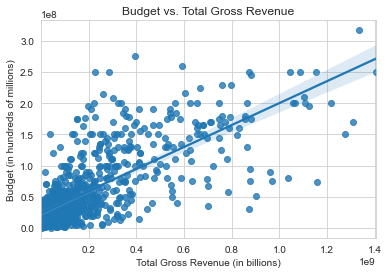

In [42]:
sns.regplot(x=movie_titles_budget['total_gross'], y=movie_titles_budget['budget'])
plt.title('Budget vs. Total Gross Revenue')
plt.xlabel('Total Gross Revenue (in billions)')
plt.ylabel('Budget (in hundreds of millions)')

### Conclusions

Our analysis recommends the following three suggestions:

* Drama, Action, Comedy, and Adventure movies should receive the most investment for production because they are extremely popular at the box office.

* While competitors are also focused on releasing Drama, Action, Comedy, and Adventure movies, the popularity of these genres is high enough that revenues should not suffer due to market competition.

* Higher production budgets tend to result in higher revenues, although this is not always and is subject to outside factors.

### Next Steps

Additional analyses may be needed for the following reasons:

* The datasets that were used only cover the period from 2010-2018. More recent data from 2019-2021 would be helpful to determine up-to-date trends.

*  Additional analyses on streaming services would be helpful since there has been an increase in popularity of services like Netflix, Amazon Prime, and movie studios are releasing movies that are exclusive to those platforms which could affect box office performance.

* Many movie theaters were closed in 2020 and in early 2021 due to COVID-19, so the future of box office revenues is unclear until more data is known about movie revenues after most movie theaters have reopened.